In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import io
import requests

In [5]:
# Load the dataset
dataset = pd.read_csv("admission.csv")

In [ ]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [6]:
print(dataset.head())

   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4


In [7]:
print(dataset.shape)

(400, 4)


In [8]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB
None


In [9]:
print(dataset.count())

admit    400
gre      400
gpa      400
rank     400
dtype: int64


In [10]:
print(dataset.columns)

Index(['admit', 'gre', 'gpa', 'rank'], dtype='object')


In [11]:
print(dataset.sum())

admit       127.000000
gre      235080.000000
gpa        1355.960003
rank        994.000000
dtype: float64


In [12]:
# get the summary statistics of the dataset
print(dataset.describe())

            admit         gre         gpa       rank
count  400.000000  400.000000  400.000000  400.00000
mean     0.317500  587.700000    3.389900    2.48500
std      0.466087  115.516536    0.380567    0.94446
min      0.000000  220.000000    2.260000    1.00000
25%      0.000000  520.000000    3.130000    2.00000
50%      0.000000  580.000000    3.395000    2.00000
75%      1.000000  660.000000    3.670000    3.00000
max      1.000000  800.000000    4.000000    4.00000


In [13]:
print(dataset.mean())

admit      0.3175
gre      587.7000
gpa        3.3899
rank       2.4850
dtype: float64


In [14]:
print(dataset.median())

admit      0.000
gre      580.000
gpa        3.395
rank       2.000
dtype: float64


C:\Users\MANSI\AppData\Local\Temp\ipykernel_34788\2368951082.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.iloc[:,1],  ax=ax1, color="r");
C:\Users\MANSI\AppData\Local\Temp\ipykernel_34788\2368951082.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.iloc[:,2],  ax=ax2, c

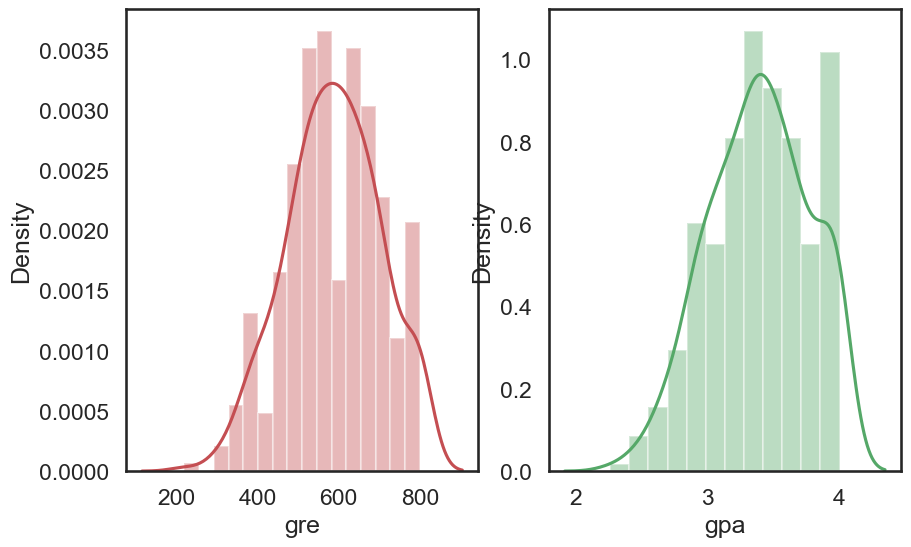

In [17]:
# seaborn and matplotlib are great libraries for Data Viz
import seaborn as sns
sns.set(style="white", context="talk")

# two plots as subplots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))

# plot GRE scores
sns.distplot(dataset.iloc[:,1],  ax=ax1, color="r");

# plot GPA grades
sns.distplot(dataset.iloc[:,2],  ax=ax2, color="g");

# display the plot 

C:\Users\MANSI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


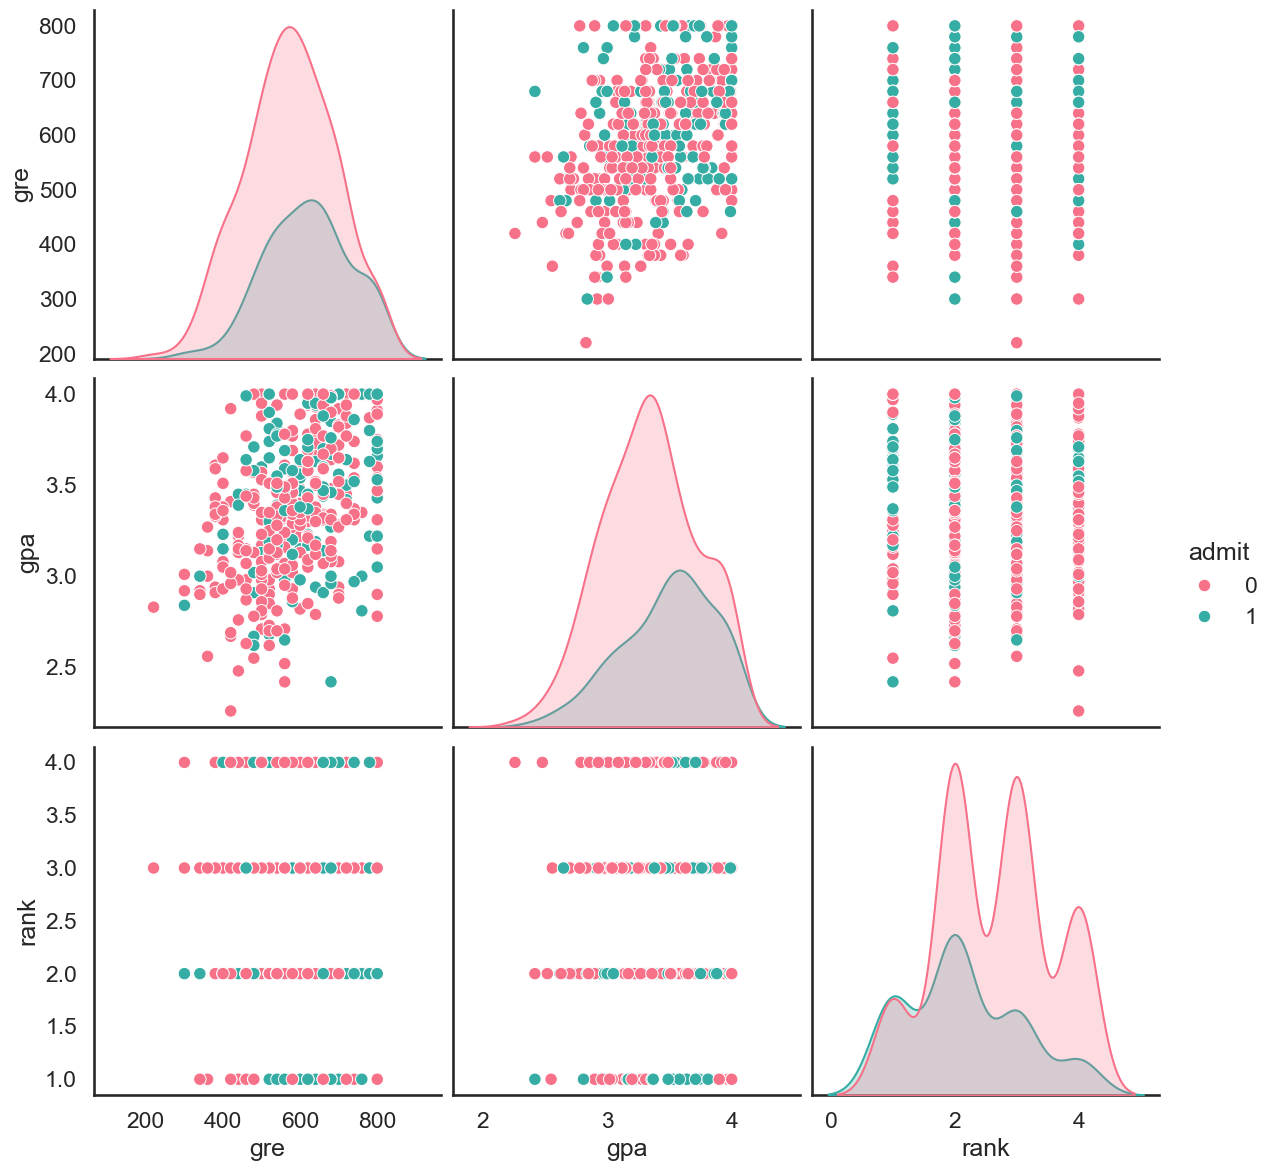

In [18]:
# multivariate analysis
sns.pairplot(dataset, hue='admit', palette="husl",
            x_vars=["gre", "gpa", "rank"],
            y_vars=["gre", "gpa", "rank"], size=4)

# display the plot 

In [19]:
# organize imports
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [20]:
# convert the dataframe into a matrix
dataArray = dataset.values

In [21]:
# split the input features and output variable
X = dataArray[:,1:4]
y = dataArray[:,0:1]

# split training and testing dataset
validation_size = 0.10
seed = 9
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(360, 3)
(40, 3)
(360, 1)
(40, 1)


In [23]:
num_trees = 200
max_features = 3
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [25]:
# fit the models and evaluate it
results = []
names = []
scoring = 'accuracy'

# evaluate each model using 10-FOLD cross validation
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\MANSI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MANSI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MANSI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

LR: 0.697222 (0.089106)
LDA: 0.700000 (0.088541)
KNN: 0.658333 (0.079592)
CART: 0.636111 (0.057534)


C:\Users\MANSI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\MANSI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\MANSI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

RF: 0.683333 (0.039675)
NB: 0.688889 (0.088541)
SVM: 0.672222 (0.074328)


C:\Users\MANSI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MANSI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MANSI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

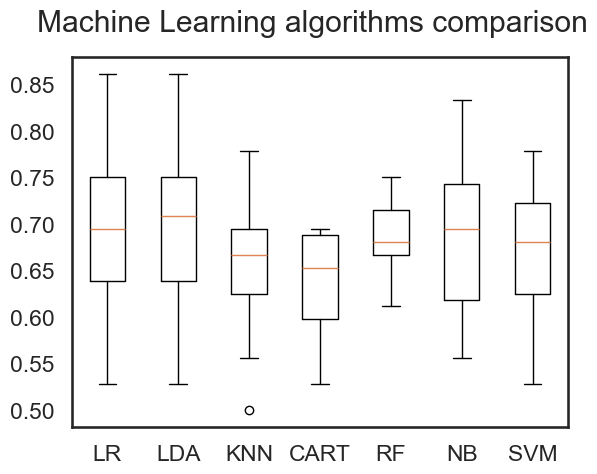

In [26]:
# boxplots for ML algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning algorithms comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [27]:
# create the model
model = LogisticRegression()

# fit the model
model.fit(X_train, Y_train)

# make predictions on the test data
predictions = model.predict(X_test)

# compute the overall accuracy and display the classification report
print("Model --> Logistic Regression")
print("Overall Accuracy: {}".format(accuracy_score(Y_test, predictions) * 100))
print(classification_report(Y_test, predictions))

Model --> Logistic Regression
Overall Accuracy: 75.0
              precision    recall  f1-score   support

         0.0       0.80      0.90      0.85        31
         1.0       0.40      0.22      0.29         9

    accuracy                           0.75        40
   macro avg       0.60      0.56      0.57        40
weighted avg       0.71      0.75      0.72        40



C:\Users\MANSI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 300x300 with 0 Axes>

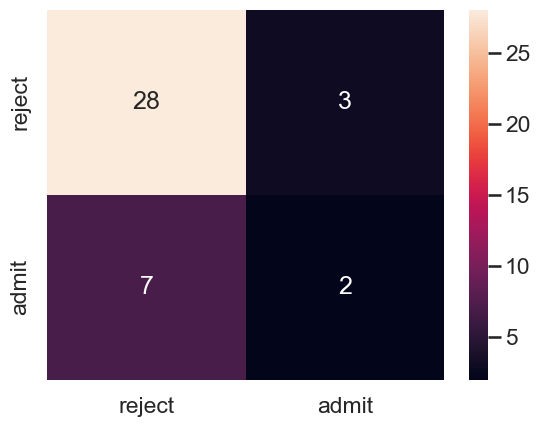

<Figure size 300x300 with 0 Axes>

In [28]:
# plot confusion matrix and display the heatmap
%matplotlib inline
cm = confusion_matrix(Y_test, predictions)
sns.heatmap(cm, 
            annot=True, 
            xticklabels=['reject', 'admit'], 
            yticklabels=['reject', 'admit'])
plt.figure(figsize=(3,3)) 

In [29]:
# make prediction on a new test data - (gre_score, gpa_grade, rank)
new_data = [(720, 4, 1), (300, 2, 1), (400, 4, 4)]

# convert the list of tuples to numpy array
new_array = np.asarray(new_data)

# the output labels
labels = ["reject", "admit"]

# make prediction
prediction = model.predict(new_array)

# get the no.of.test cases used
no_of_test_cases, cols = new_array.shape

In [30]:
# show the result
for i in range(no_of_test_cases):
    print("Status of STUDENT with GRE score= {}, GPA grade= {}, Rank= {} will be --> {}".format(new_data[i][0], new_data[i][1], new_data[i][2], labels[int(prediction[i])]))

Status of STUDENT with GRE score= 720, GPA grade= 4, Rank= 1 will be --> admit
Status of STUDENT with GRE score= 300, GPA grade= 2, Rank= 1 will be --> reject
Status of STUDENT with GRE score= 400, GPA grade= 4, Rank= 4 will be --> reject
